# –î–ó –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω—ã–µ –º–µ—Ç–æ–¥—ã –∞–Ω–∞–ª–∏–∑–∞ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤


–í–∑—è—Ç—å —Å –ø—Ä–æ—à–ª–æ–≥–æ –¥–æ–º–∞—à–Ω–µ–≥–æ –∑–∞–¥–∞–Ω–∏—è —Ä—è–¥ (–≤ –¥–≤—É—Ö –≤–∞—Ä–∏–∞–Ω—Ç–∞—Ö - —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π –∏ –Ω–µ—Ç) –∏ –ø—Ä–∏–±–ª–∏–∑–∏—Ç—å –æ–±–∞ —ç—Ç–∏ –≤–∞—Ä–∏–∞–Ω—Ç–∞ –º–æ–¥–µ–ª—è–º–∏ –∏–∑ –∫–ª–∞—Å—Å–∞ MA. –û—Ü–µ–Ω–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –∏ –ø—Ä–∏—Å–ª–∞—Ç—å —Å–æ–æ–±—Ä–∞–∂–µ–Ω–∏—è –ø–æ—á–µ–º—É –±—ã–ª–∞ –≤—ã–±—Ä–∞–Ω–∞ —Ç–∞ –∏–ª–∏ –∏–Ω–∞—è –º–æ–¥–µ–ª—å


In [3]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.iolib.table import SimpleTable
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from scipy.stats import boxcox
from pandas.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings("ignore") 

In [4]:
robberies_in_boston = pd.read_csv("data/TimeSeries/monthly-boston-armed-robberies-j.csv")


In [10]:
def difference(dataset, lag):
    diff = list()
    for i in range(lag, len(dataset)):
        value = dataset[i] - dataset[i - lag]
        diff.append(value)
    return diff

In [5]:
def tsplot(y, lags=None, figsize=(12, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax)
        ts_ax.set_title('–ò—Ç–æ–≥–æ–≤–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ —Ä—è–¥–∞')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [6]:
def test_stationarity(timeseries):
    print('Results of Jarque-Bera Test:')
    row =  ['JB', 'p-value', 'skew', 'kurtosis']
    jb_test = sm.stats.stattools.jarque_bera(timeseries)
    a = np.vstack([jb_test])
    itog = SimpleTable(a, row)
    print (itog)
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
  
    row =  ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    a = np.vstack([dftest])
    itog = SimpleTable(a, row)
    print (itog)
    print ('Critical values: ', dftest[4])
    if dftest[0]> dftest[4]['5%']: 
        print ('\n {:0.2f} >  {:0.2f} –µ—Å—Ç—å –µ–¥–∏–Ω–∏—á–Ω—ã–µ –∫–æ—Ä–Ω–∏, —Ä—è–¥ –Ω–µ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω'.format(dftest[0],dftest[4]['5%']))
    else:
        print ('\n {:0.2f} <  {:0.2f} –µ–¥–∏–Ω–∏—á–Ω—ã—Ö –∫–æ—Ä–Ω–µ–π –Ω–µ—Ç, —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω'.format(dftest[0],dftest[4]['5%']))

In [148]:
def series_analyze(series,lag = 12 ):
    series_rezult = np.diff( difference(boxcox(series, 0),lag), 1)  # –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–µ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ —Ä—è–¥–∞
    with plt.style.context('bmh'):
        fig, axs = plt.subplots(2, 1, tight_layout=True, figsize=(8,8))

        axs[0].plot(series,     color='blue' )
        axs[0].set_title('–ò—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥')
       
        axs[1].plot(series_rezult,   color='blue')
        axs[1].set_title('–°—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π —Ä—è–¥')

        fig.show()

    #print(series_rezult)
    
    return series_rezult

## –ü—Ä–∏–≤–æ–¥–∏–º –∏—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥ –∫ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ–º—É

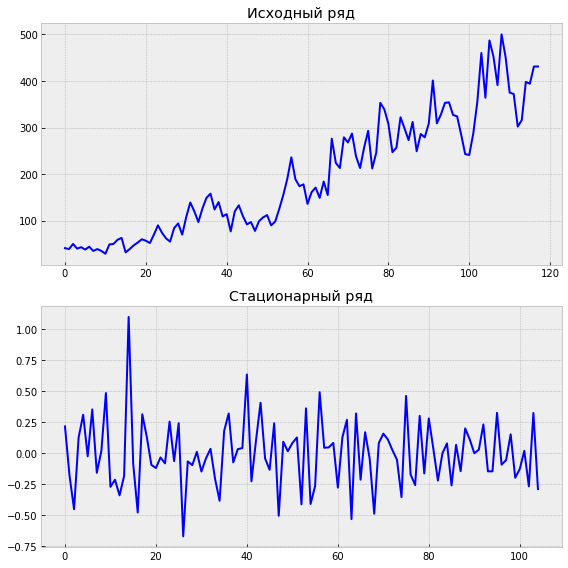

In [149]:
series = robberies_in_boston["Count"]   # –∏—Å—Ö–æ–¥–Ω—ã–π –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π —Ä—è–¥
series_s = series_analyze(series)    # —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π —Ä—è–¥

In [30]:
#print(series_s)

# –≠–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ

In [36]:
# —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

In [37]:
# –≤–∑–≤–µ—à–µ–Ω–Ω–æ–µ —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

In [38]:
# —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ
def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

In [39]:
ema = exponential_moving_average(series, 0.2)

In [40]:
len(ema)

118

–õ—É—á—à–µ –≤—Å–µ–≥–æ –ø–æ–≤—Ç–æ—Ä—è–µ—Ç —Ä—è–¥ –≤–∑–≤–µ—à–µ–Ω–Ω–æ–µ —Å—Ä–µ–¥–Ω–µ–µ, —Ç–∞–∫ –∫–∞–∫ –≤–µ—Å –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤—ã—à–µ. –≠—Ç–æ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –∏ –≤ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ–º —Ä—è–¥–µ.

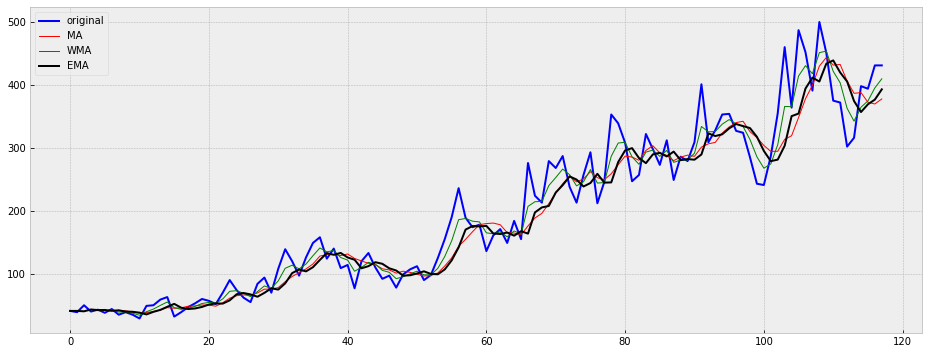

In [127]:
ema = exponential_moving_average(series, 0.3)
wma = weighted_moving_average(series, 7, [1,1,2,3,5,8,13])
ma = moving_average(series, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 6))
    plt.plot(series, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='1', label='MA')
    plt.plot(wma, color='green', linewidth='1', label='WMA')
    plt.plot(ema, color='black', linewidth='2', label='EMA')
    plt.legend()

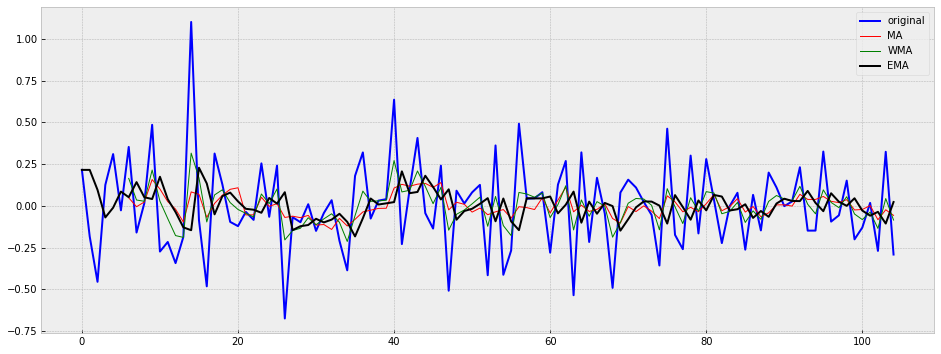

In [128]:
ema = exponential_moving_average(series_s, 0.3)
wma = weighted_moving_average(series_s, 7, [1,1,2,3,5,8,13])
ma = moving_average(series_s, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 6))
    plt.plot(series_s, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='1', label='MA')
    plt.plot(wma, color='green', linewidth='1', label='WMA')
    plt.plot(ema, color='black', linewidth='2', label='EMA')
    plt.legend()

–ß–µ–º –º–µ–Ω—å—à–µ ùõº, —Ç–µ–º –±–æ–ª—å—à–µ –≤–ª–∏—è–Ω–∏—è –æ–∫–∞–∑—ã–≤–∞—é—Ç –ø—Ä–µ–¥—ã–¥—É—â–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, –∏ —Ç–µ–º —Å–∏–ª—å–Ω–µ–µ —Å–≥–ª–∞–∂–∏–≤–∞–µ—Ç—Å—è —Ä—è–¥. 
–ß–µ–º –º–µ–Ω—å—à–µ ùõº —Ç–µ–º –±–æ–ª—å—à–µ –º—ã –æ–ø–∏—Ä–∞–µ–º—Å—è –Ω–∞ –∏—Å—Ç–æ—Ä–∏—é.
–ü—Ä–∏ –±–æ–ª—å—à–æ–º –∑–Ω–∞—á–µ–Ω–∏–µ –∫–æ—ç—Ñ. —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è ùõº= 0.8 –≤–∏–¥–∏–º —Å–∏–ª—å–Ω–æ–µ —Å–º–µ—â–µ–Ω–∏–µ –∏ –æ—Ç—Å—Ç–∞–µ–º –æ—Ç —Ç—Ä–µ–Ω–¥–∞, —Ç–µ–º –º–µ–Ω—å—à–µ –º—ã –æ–ø–∏—Ä–∞–µ–º—Å—è –Ω–∞ –ø—Ä–µ–¥—ã–¥—É—â–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ.

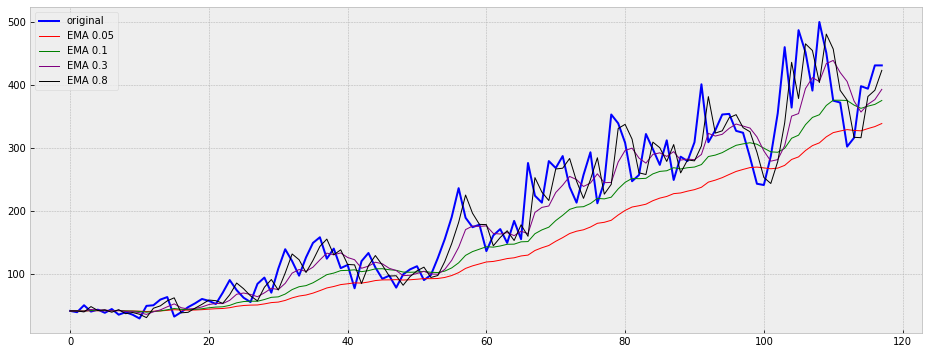

In [126]:
alphas = [0.05,0.1,0.3,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 6))
    plt.plot(series, color='blue',label='original')
    for i in range(len(alphas)):
        ser = exponential_moving_average(series, alphas[i])
        plt.plot(ser, color=colors[i], linewidth='1', label='EMA {}'.format(alphas[i]))
    plt.legend()

–¢–∞–∫ –∫–∞–∫ —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π –∏ —Ç—Ä–µ–Ω–¥ —É–∂–µ –∏—Å–∫–ª—é—á–µ–Ω, –≤—ã—Å–æ–∫–∏–π –∫–æ—ç—Ñ. —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è —É–±–∏—Ä–∞–µ—Ç —Ç–æ–ª—å–∫–æ –≤—Å–ø–ª–µ—Å–∫–∏,  —Å–º–µ—â–µ–Ω–∏—è –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è

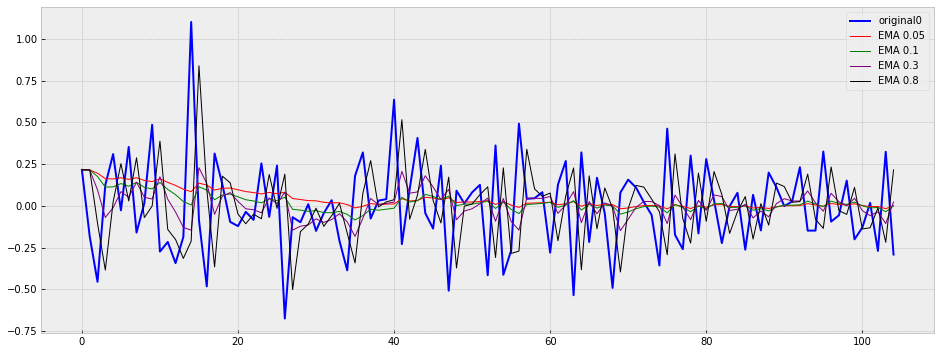

In [129]:
alphas = [0.05,0.1,0.3,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 6))
    plt.plot(series_s, color='blue',label='original0')
    for i in range(len(alphas)):
        ser = exponential_moving_average(series_s, alphas[i])
        plt.plot(ser, color=colors[i], linewidth='1', label='EMA {}'.format(alphas[i]))
    plt.legend()

# –î–≤–æ–π–Ω–æ–µ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ

In [61]:
# alpha - –∫–æ—ç—Ñ –≤–ª–∏—è–Ω–∏—è —É—Ä–æ–≤–Ω—è, beta - –∫–æ—ç—Ñ. –≤–ª–∏—è–Ω–∏—è —Ç—Ä–µ–Ω–¥–∞
def double_ema(series, alpha, beta):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return pd.Series(result)

In [137]:
def plot_dema(series,alpha, beta):
    dema = double_ema(series, alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 4))
        plt.plot(series, color='blue',label='original')
        plt.plot(dema, color='red', linewidth='4', label='DEMA')
        plt.title("alpha={}, beta={}".format(alpha, beta))
        plt.legend()

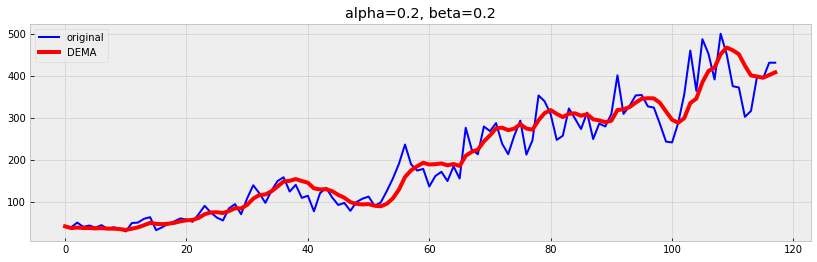

In [138]:
plot_dema(series,0.2, 0.2)

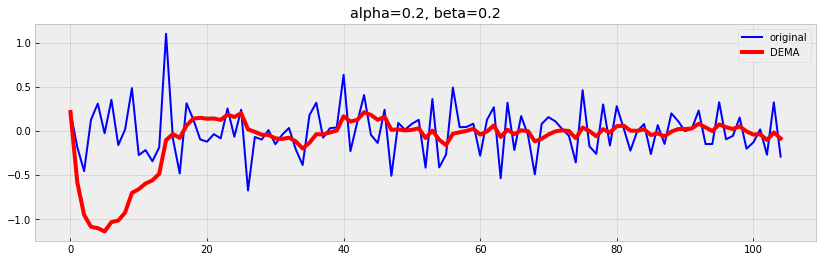

In [139]:
plot_dema(series_s,0.2, 0.2)

–£–º–µ–Ω—å—à–∞–µ–º –≤–ª–∏—è–Ω–∏–µ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –Ω–µ—Å–≥–ª–∞–∂–µ–Ω–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Ç—Ä–µ–Ω–¥, –≤–ª–∏—è–Ω–∏–µ –Ω–∞ —É—Ä–æ–≤–µ–Ω—å —É–≤–µ–ª–∏—á–∏–≤–∞–µ–º:

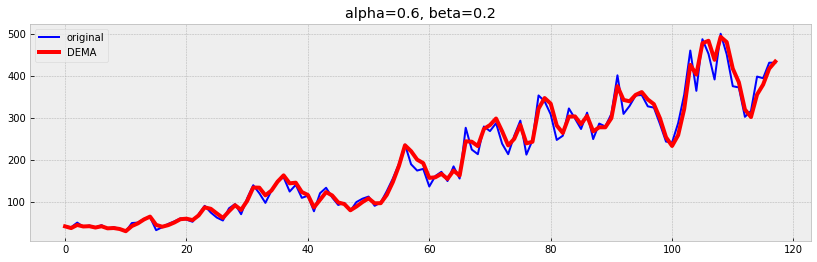

In [140]:
plot_dema(series,0.6, 0.2) 

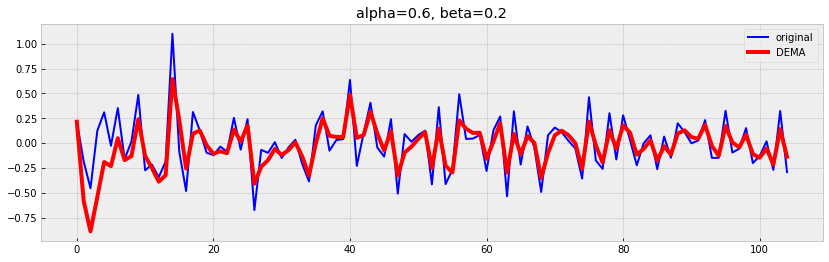

In [141]:
plot_dema(series_s,0.6, 0.2) 

–°–∏–ª—å–Ω–æ –∑–∞–Ω–∏–∂–∞–µ–º –≤–ª–∏—è–Ω–∏–µ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –Ω–µ—Å–≥–ª–∞–∂–µ–Ω–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Ç—Ä–µ–Ω–¥ –∏ –Ω–∞ —É—Ä–æ–≤–µ–Ω—å, –¥–ª—è –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ–≥–æ —Ä—è–¥–∞ —Ç—Ä–µ–Ω–¥ –æ—á–µ–Ω—å –∑–∞–ø–∞–∑–¥—ã–≤–∞–µ—Ç:

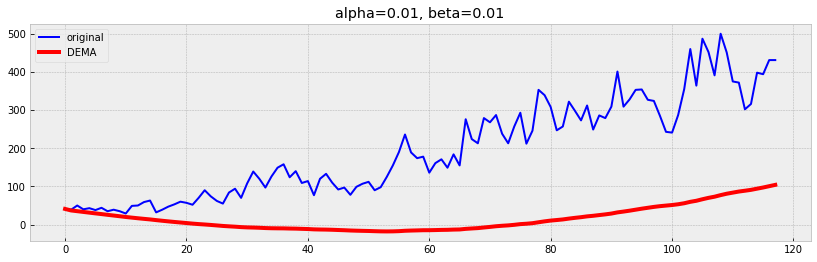

In [144]:
plot_dema(series,0.01, 0.01)  

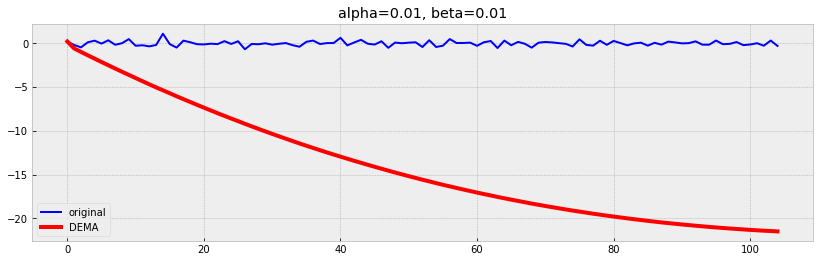

In [150]:
plot_dema(series_s,0.01, 0.01)  

–£–º–µ–Ω—å—à–∞–µ–º –≤–ª–∏—è–Ω–∏–µ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ —Å–≥–ª–∞–∂–µ–Ω–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Ç—Ä–µ–Ω–¥ –∏ –Ω–∞ —É—Ä–æ–≤–µ–Ω—å, —Å–≥–ª–∞–∂–µ–Ω–Ω—ã–π —Ä—è–¥ –Ω–∞–æ–±–æ—Ä–æ—Ç –µ—â–µ –±–æ–ª—å—à–µ –≤—ã—è–≤–ª—è–µ—Ç –≤—Å–ø–ª–µ—Å–∫–∏. –ü—Ä–æ—è–≤–ª—è–µ—Ç—Å—è –∏ –Ω–∞ –∏—Å—Ö–æ–¥–Ω–æ–º —Ä—è–¥–µ, –∏ –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ–º —Ä—è–¥–µ:

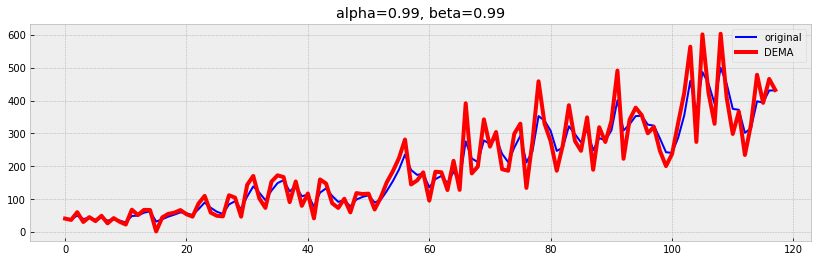

In [146]:
plot_dema(series, 0.99, 0.99)  

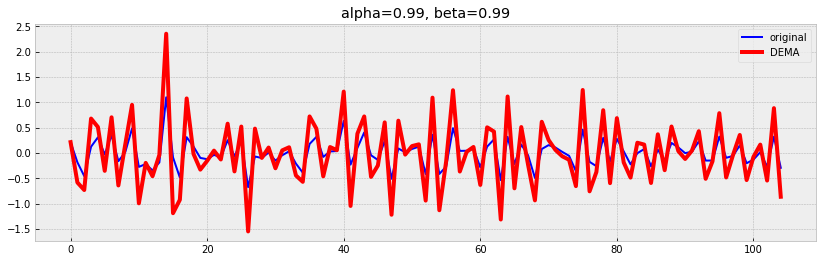

In [147]:
plot_dema(series_s, 0.99, 0.99)   # —Ç–∞–∫ –∫–∞–∫ —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω –≤—ã—è–≤–ª—è–µ–º —É—Ä–æ–≤–Ω–∏, —Ç—Ä–µ–Ω–¥ 

### –î–æ–±–∞–≤–ª—è–µ–º —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏

In [70]:
def initial_trend(series, season_len):
    return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len

In [71]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

In [72]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [162]:
def plot_tema(alpha, beta, gamma, ser, ser_to_plot, n_preds=24):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(10,4))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

–°–ª–∞–±–æ–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ —É—Ä–æ–≤–Ω–µ–π, —Ç—Ä–µ–Ω–¥–∞ –∏ –±–æ–ª–µ–µ —è–≤–Ω–æ–µ –≤—ã—è–≤–ª–µ–Ω–∏–µ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ —Ö–æ—Ä–æ—à–æ –æ–ø–∏—Å—ã–≤–∞–µ—Ç —Ä—è–¥

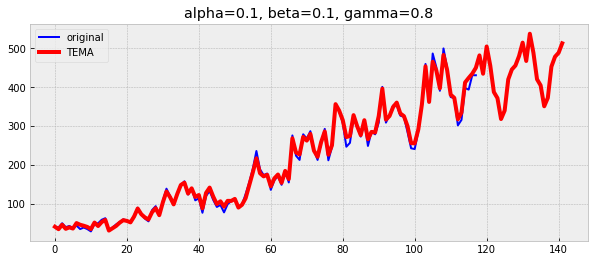

In [179]:
plot_tema(0.1, 0.1, 0.8,series,series)

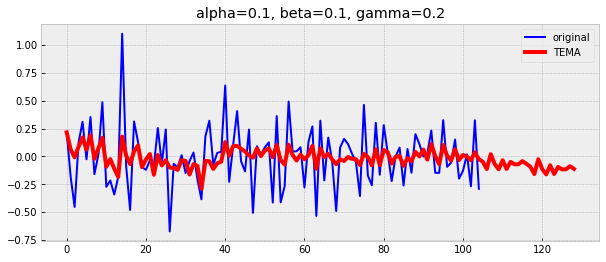

In [165]:
plot_tema(0.1, 0.1, 0.2,series_s,series_s)

–°–∏–ª—å–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ —É—Ä–æ–≤–Ω–µ–π –∏ –±–æ–ª—å—à–æ–µ –≤–ª–∏—è–Ω–∏–µ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è, –∞ –Ω–µ –≤—Å–µ–π –∏—Å—Ç–æ—Ä–∏–∏ –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–º —Ä—è–¥–µ, –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –±–æ–ª—å—à–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ 

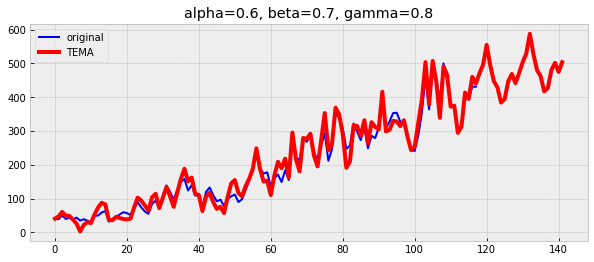

In [166]:
plot_tema(0.6, 0.7, 0.8,series,series)

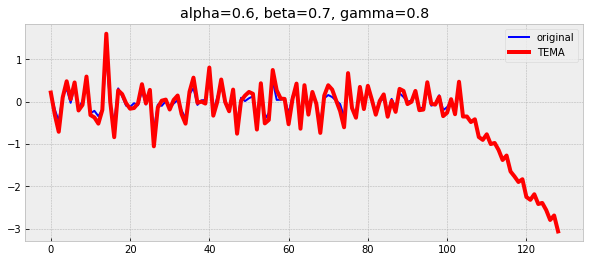

In [167]:
plot_tema(0.6, 0.7, 0.8,series_s,series_s)

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –ø–æ–¥–æ–±—Ä–∞–Ω—ã –ø–ª–æ—Ö–æ, –Ω–∞—Ä—É—à–µ–Ω  —Ç—Ä–µ–Ω–¥ –∏ –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ –≤—ã—è–≤–ª–µ–Ω–∞ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å

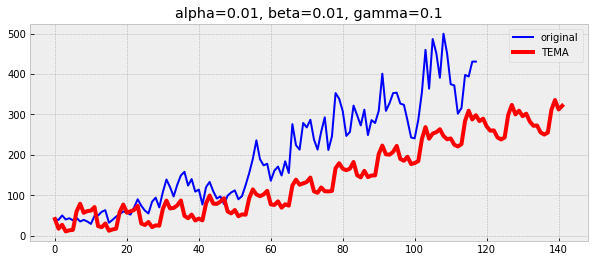

In [175]:
plot_tema(0.01, 0.01, 0.1,series,series)

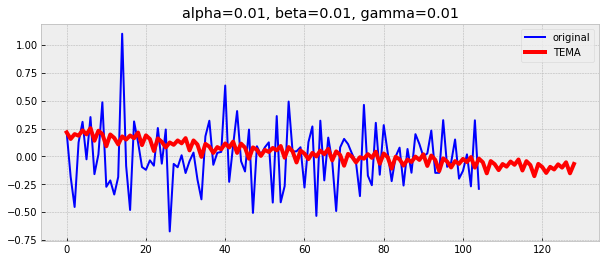

In [177]:
plot_tema(0.01, 0.01, 0.01,series_s,series_s)